# Φθίνουσα και εξαναγκασμένη ταλάντωση

Στο παρόν notebook θα λύσουμε αναλυτικά με το sympy τις εξισώσεις της φθίνουσας και της εξαναγκασμένης ταλάντωσης και θα τυπώσουμε τα ανάλογα διαγράμματα.

Ξεκινάμε εισάγωντας τα πακέτα που θα χρειαστούμε:

In [1]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import *
import sympy as sp
# We need linspace for matplotlib plots with lambdify...
from numpy import linspace
import numpy as np

In [2]:
# Αν και δεν θα χρησιμοποιήσουμε το matplotilib το εισάγουμε για να καθορίσουμε τις διαστάσεις των διαγραμμάτων παρακάτω
# αφού το sympy χρησιμοποιεί εσωτερικά το matplotlib... 
# set figure size and font size for notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (10,7)
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12

Ορίζουμε μερικά σύμβολα για τις εξισώσεις μας

In [3]:
# symbols
t = sp.Symbol('t', real=True)
m, g, b, w, w0, D= sp.symbols('m g b \omega \omega_0 D', positive=True, real=True)  # 
v0, x0, F0 = sp.symbols('v_0 x_0 F_0', real=True)
v = sp.Function('v')
x = sp.Function('x')
A = sp.Function('Α')
F = sp.Function('F')
a = sp.Function('a')

## Φθίνουσα ταλάντωση

Για τη φθίνουσα ταλάντωση η εξίσωση της κίνησης είναι:
$$ a(t) = -ω^2_0x(t) - (b/m)v(t) $$
Την γράφουμε ως εξίσωση στο sympy

In [4]:
eq1 = sp.Eq(x(t).diff(t,t) + w0**2*x(t) + (b/m)*x(t).diff(t),  0)

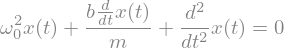

In [5]:
display(eq1)

Και την λύνουμε με την dsolve() του sympy

In [6]:
xs = sp.dsolve(eq1)

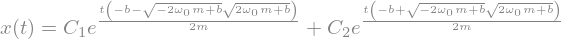

In [7]:
xs

Οι σταθερές C1, C2 καθορίζονται από τις αρχικές συνθήκες.

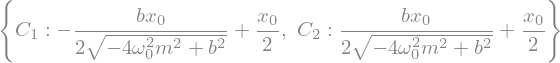

In [8]:
c = sp.solve([xs.rhs.subs(t, 0) - x0, xs.rhs.diff(t).subs(t, 0) - 0]) #x_0 = A and v_0 = 0
c[0]

Και αντικαθιστούμε τις σταθερές στην αρχική λύση ώστε να βρούμε την λύση με τις αρχικές συνθήκες.

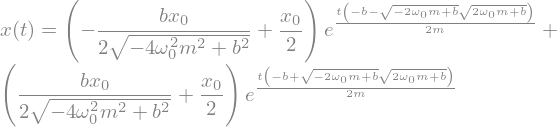

In [9]:
xs = xs.subs(c[0])
xs

Τώρα μένει να αντικαταστήσουμε με τιμές τα μεγέθη και να κάνουμε γραφική παράσταση στην λύση μας. Αφήνουμε την σταθερά $b$ ώστε να κάνουμε γραφικές παραστάσεις με διάφορες τιμές της.

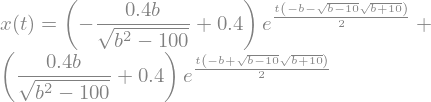

In [10]:
consts = {m: 1, x0: 0.8, w0: 5}
xsf=xs.subs(consts)
display(xsf)

Κάνουμε την παραπάνω συνάρτηση ώστε να μπορέσουμε να δώσουμε τιμές για γραφική παράσταση με το matplotlib (άν θέλουμε...)

In [11]:
xsfl = sp.lambdify(t, xsf, 'numpy') 

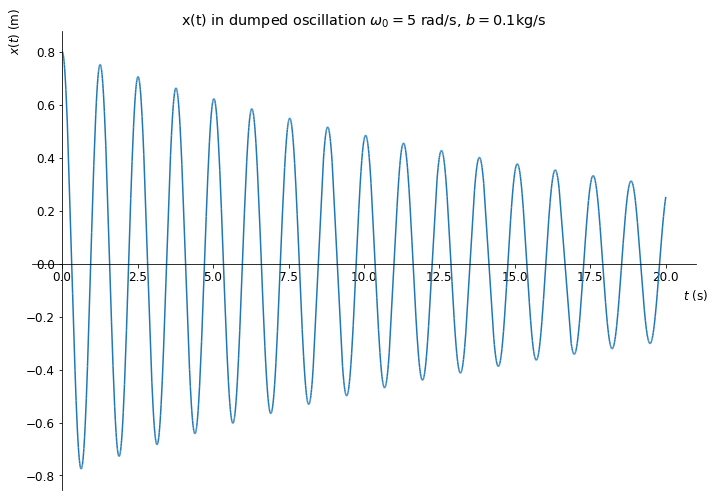

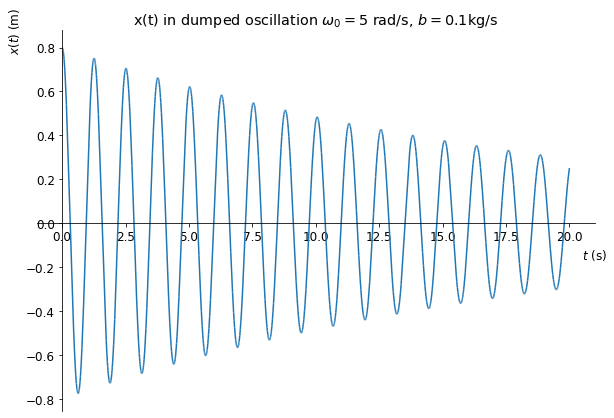

In [12]:
fig1 = sp.plot((xsf.rhs.subs(b, 0.1), (t, 0, 20)), title='x(t) in dumped oscillation $\omega_0 =5$ rad/s, $b=0.1$kg/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')
fig1.save('./figures/Oscillation-b0.1.png')

## Εξαναγκασμένη ταλάντωση

Η εξίσωση της κίνησης είναι:
$$ a(t) = -ω^2_0x(t) - (b/m)v(t) + (F_0/m)\cos(\omega t) $$

In [13]:
eq2 = sp.Eq(x(t).diff(t,t) + (w0**2)*x(t) + (b/m)*x(t).diff(t) - (F0/m)*cos(w*t),  0)

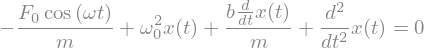

In [14]:
display(eq2)

Μπορούμε να λύσουμε τη διαφορική μαζί με τις αρχικές συνθήκες με μία εντολή, όπως παρακάτω:

In [15]:
# Solve the differential equation with initial conditions!
# No need to calculate the integration constants C1, C2.
# Εδώ το σώμα είναι ακίνητο στην θέση ισορροπίας του.
ics = {x(0): 0, x(t).diff(t).subs(t, 0): 0}
xds = sp.dsolve(eq2, ics=ics)

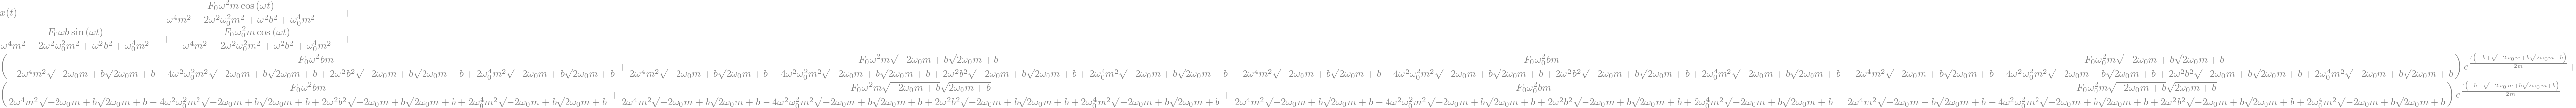

In [16]:
xds

Η γενική λύση είναι τεράστια, οπότε την απλοποιούμε άν γίνεται:

In [17]:
xds = sp.simplify(xds)

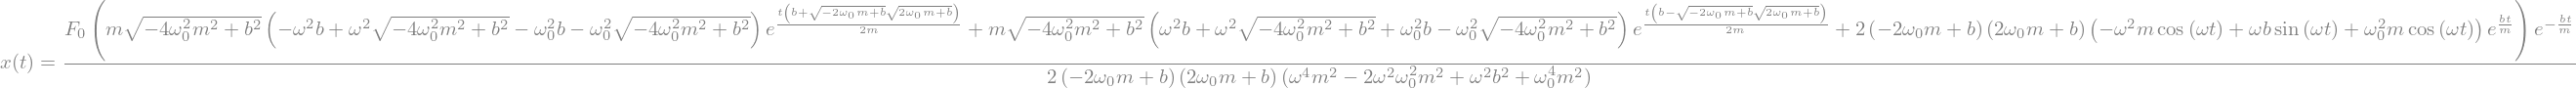

In [18]:
xds

Η γενική λύση είναι μία ταλάντωση με συχνότητα $\omega$ (της διεγείρουσας δύναμης) αλλά περιέχει τους δύο πρώτους όρους που είναι μεταβατικοί ταλαντωτικοί όροι.

Έχει ενδιαφέρον να δούμε πόσο γρήγορα σταθεροποιείται το πλάτος. Ας κάνουμε μερικές γραφικές παρααστάσεις:

In [19]:
consts = {m: 1, F0: 10, b: 0.05, w0: 5, w: 5}

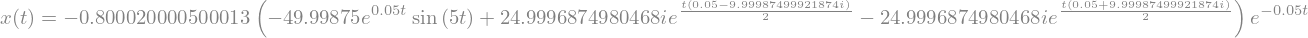

In [20]:
sol=xds.subs(consts)
display(sol)

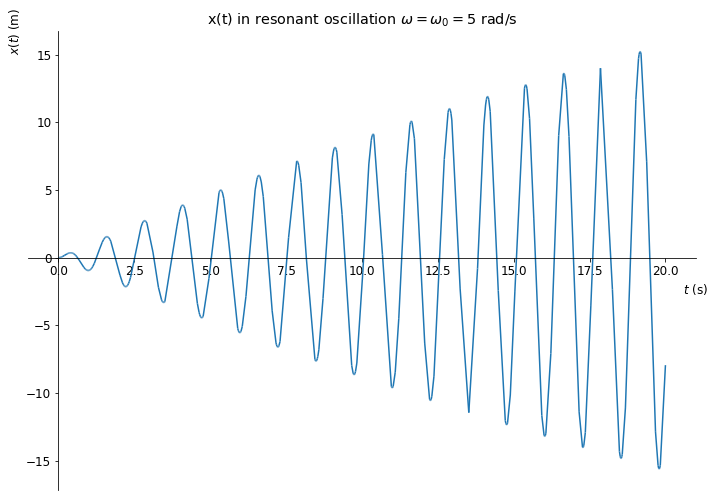

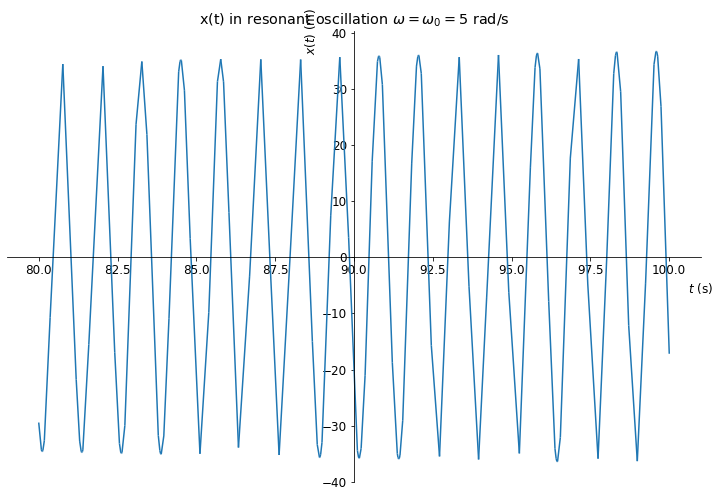

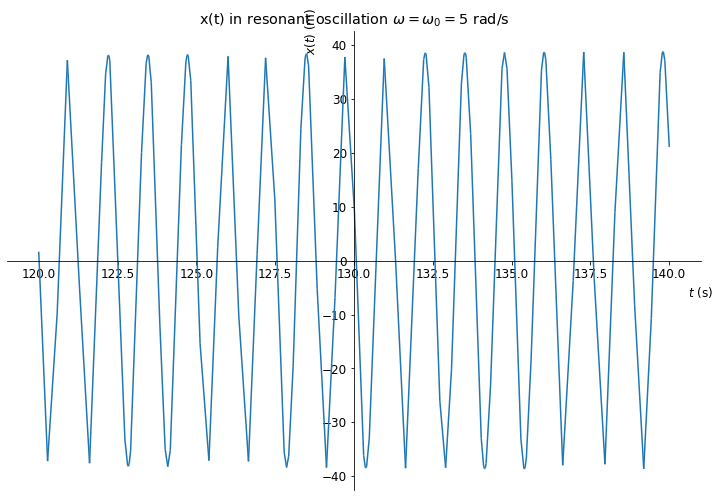

In [21]:
fig2 = sp.plot((sol.rhs, (t, 0, 20)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')
fig3 = sp.plot((sol.rhs, (t, 80, 100)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')
fig4 = sp.plot((sol.rhs, (t, 120, 140)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')


Χρειάζεται πάνω από 120 δευτερόλεπτα για να αποκτήσει το μέγιστο (σταθερό) πλάτος της 40m!!!

Ας δοκιμάσουμε με διαφορετική συχνότητα διεγέρτη...

In [22]:
consts = {m: 1, F0: 10, b: 0.05, w0: 5, w: 2}

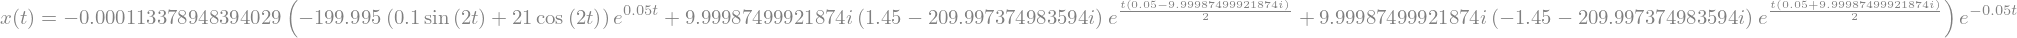

In [23]:
sol=xds.subs(consts)
display(sol)

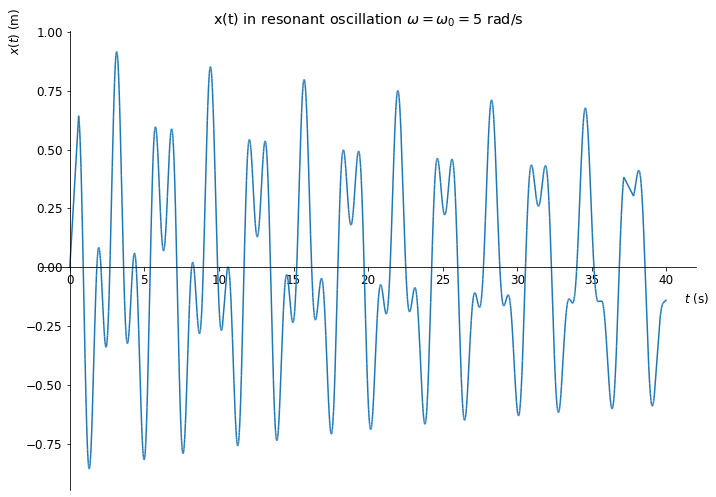

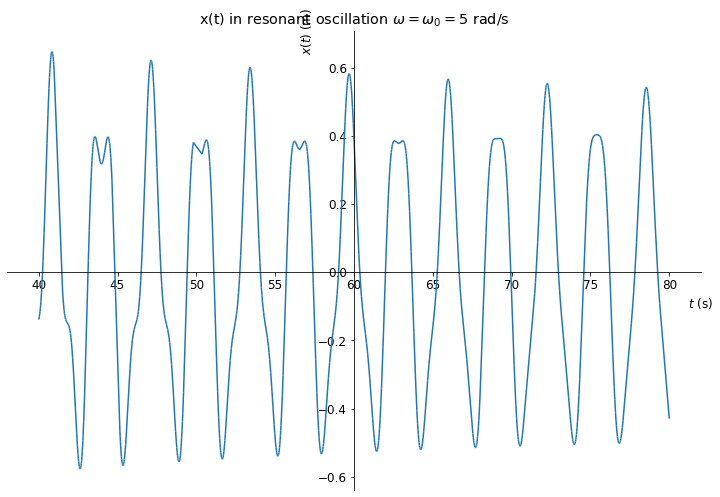

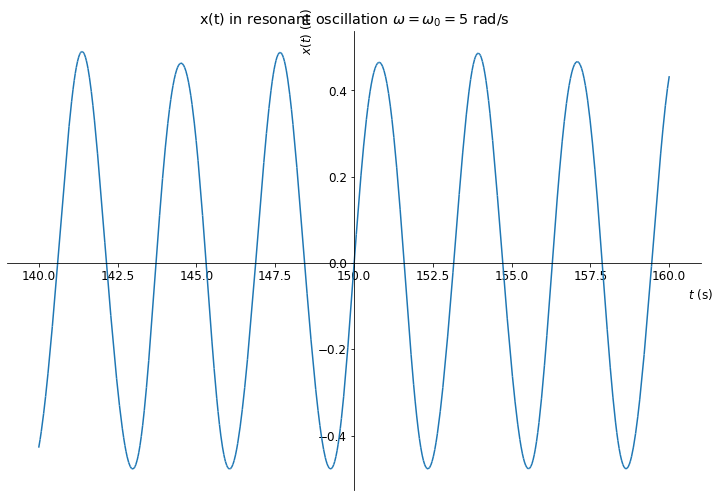

In [24]:
fig5 = sp.plot((sol.rhs, (t, 0, 40)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')
fig6 = sp.plot((sol.rhs, (t, 40, 80)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')
fig7 = sp.plot((sol.rhs, (t, 140, 160)), title='x(t) in resonant oscillation $\omega=\omega_0 =5$ rad/s', ylabel='$x(t)$ (m)', xlabel='$t$ (s)')


Και πάλι θέλει πολύ χρόνο, αλλά τελικά το πλάτος σταθεροποιείται σε πολύ μικρότερη τιμή βεβαίως. 

### Χωρίς τους μεταβατικούς όρους

Αν κρατήσουμε μόνο τους όρους της ταλάντωσης η λύση μας είναι:

In [25]:
x = F0*(-2*w0*m + b)*(2*w0*m + b)*(-w**2*m*cos(w*t) + w*b*sin(w*t) + w0**2*m*cos(w*t))/((-2*w0*m + b)*(2*w0*m + b)*(w**4*m**2 - 2*w**2*w0**2*m**2 + w**2*b**2+w0**4*m**2))

Για $b \neq 2m\omega_0$ έχουμε:

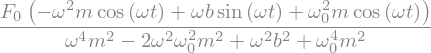

In [26]:
x

In [27]:
x = F0*(-2*w0*m + b)*(2*w0*m + b)*(w*b*sin(w*t) + (w0**2-w**2)*m*cos(w*t))/((-2*w0*m + b)*(2*w0*m + b)*(w**4*m**2 - 2*w**2*w0**2*m**2 + w**2*b**2+w0**4*m**2))

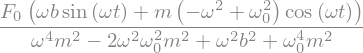

In [28]:
x

In [29]:
consts = {m: 1, F0: 10, w0: 5}

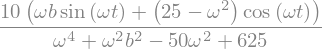

In [30]:
x=x.subs(consts)
display(x)

Χρησιμοποιώντας την τριγωνομετρική ταυτότητα (αρμονική πρόσθεση)
$$a\cos(x) + b\sin(x) = c\cos(x + \varphi)$$
με 
$$c = \operatorname{sgn}(a) \sqrt{a^2 + b^2}$$
$$\tan\varphi = -\frac{b}{a}$$
η εξίσωσή μας $x(t)$ γράφεται:

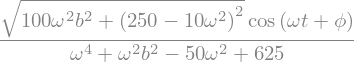

In [31]:
c, a, b, f = sp.symbols('c a b \phi')
x = sp.sqrt((10*b*w)**2 + (250 - 10*w**2)**2)/(w**4 + b**2*w**2 - 50*w**2 + 625)*cos(w*t + f) 
display(x)

Οπότε το πλάτος ως συνάρτηση της συχνότητας διεγέρτη $\omega$ θα είναι:

In [32]:
A = sp.sqrt((10*b*w)**2 + (250 - 10*w**2)**2)/(w**4 + b**2*w**2 - 50*w**2 + 625)

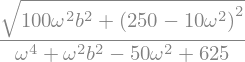

In [33]:
A

Τώρα μπορούμε να κάνουμε γραφικές παραστάσεις για το πλάτος ως συνάρτηση του $\omega$:

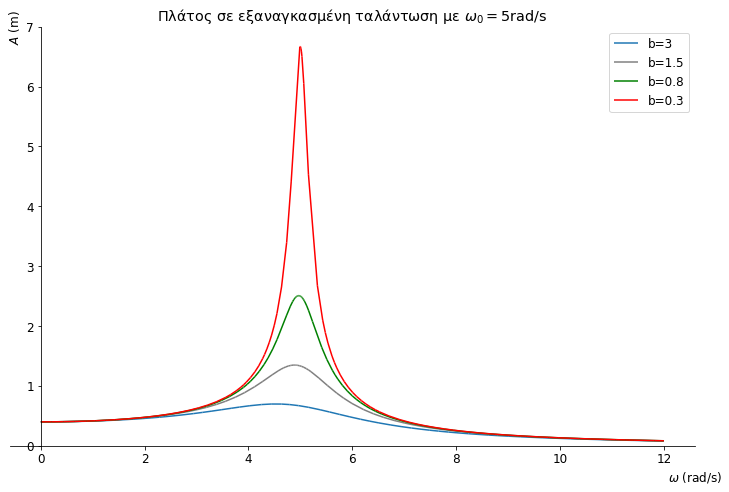

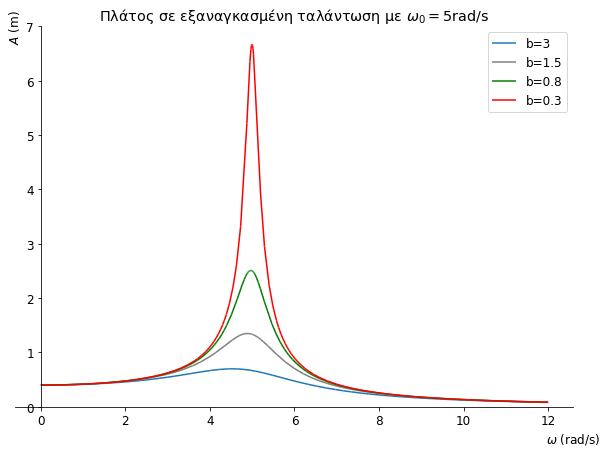

In [34]:
fig8 = sp.plot((A.subs(b, 3), (w, 0, 12)), show= false, ylim=[0, 7], label='b=3', ylabel='$A$ (m)', xlabel='$\omega$ (rad/s)')
p2 = sp.plot((A.subs(b, 1.5), (w, 0, 12)), show= false, ylim=[0, 7], line_color='gray', label='b=1.5')
p3 = sp.plot((A.subs(b, 0.8), (w, 0, 12)), show= false, ylim=[0, 7], line_color='green', label='b=0.8')
p4 = sp.plot((A.subs(b, 0.3), (w, 0, 12)), show= false, ylim=[0, 7], line_color='red', label='b=0.3')
fig8.append(p2[0])
fig8.append(p3[0])
fig8.append(p4[0])
fig8.legend=true
fig8.title='Πλάτος σε εξαναγκασμένη ταλάντωση με $\omega_0=5$rad/s'
fig8.show()
fig8.save('./figures/Resonance-variusb.png')

Για να βρούμε τις θέσεις των μεγίστων για τα διάφορα $b$ καταφεύγουμε στην ανάλυση. Θα βρούμε τις θέσεις μηδενισμού της παραγώγου της συνάρτησης $A(\omega)$...

In [35]:
dA = A.diff(w)

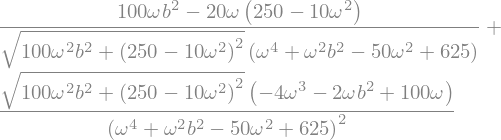

In [36]:
dA

In [37]:
eq3 = sp.Eq(dA, 0)

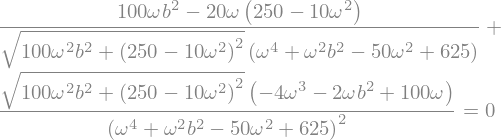

In [38]:
eq3

In [39]:
eq4 = sp.solve(eq3, w)

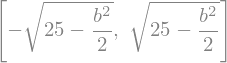

In [40]:
eq4

Η αρνητκή τιμή δεν έχει νόημα οπότε αντικαθιστούμε στην $A(\omega)$ την θετική τιμή για το $\omega$.
Τώρα η συνάρτηση $A_{max}=f(\omega)$ δεν περιέχει τα $b$, οπότε μπορούμε να την προσθέσουμε στο προηγούμενο διάγραμμα.

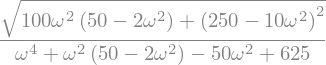

In [41]:
Amax = A.subs(b, sqrt(50 - 2*w**2))
Amax

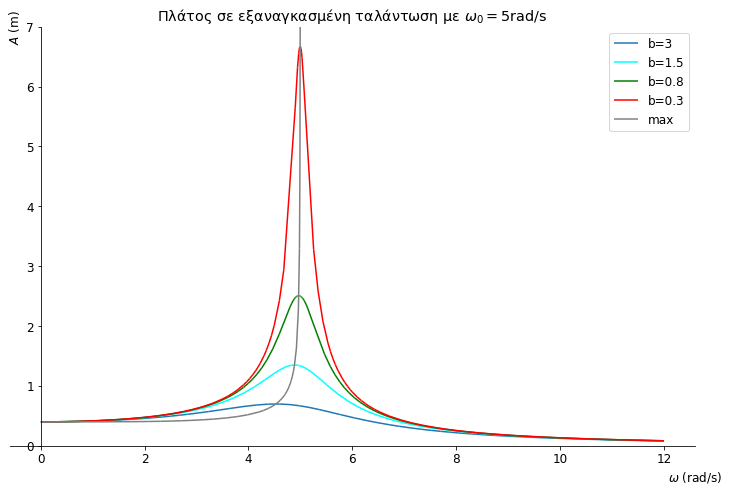

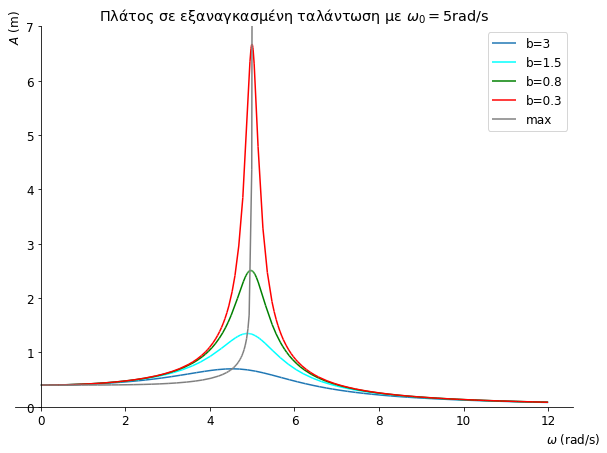

In [42]:
fig9 = sp.plot((A.subs(b, 3), (w, 0, 12)), show= false, ylim=[0, 7], label='b=3', ylabel='$A$ (m)', xlabel='$\omega$ (rad/s)')
p2 = sp.plot((A.subs(b, 1.5), (w, 0, 12)), show= false, ylim=[0, 7], line_color='cyan', label='b=1.5')
p3 = sp.plot((A.subs(b, 0.8), (w, 0, 12)), show= false, ylim=[0, 7], line_color='green', label='b=0.8')
p4 = sp.plot((A.subs(b, 0.3), (w, 0, 12)), show= false, ylim=[0, 7], line_color='red', label='b=0.3')
p5 = sp.plot((Amax, (w, 0, 12)), show= false, ylim=[0, 7], line_color='gray', label='max')
fig9.append(p2[0])
fig9.append(p3[0])
fig9.append(p4[0])
fig9.append(p5[0])
fig9.legend=true
fig9.title='Πλάτος σε εξαναγκασμένη ταλάντωση με $\omega_0=5$rad/s'
fig9.show()
fig9.save('./figures/Resonance-variusb-maxima.png')

Ένα τελεταίο βήμα (και σχήμα). Χρησιμοποιώντας το matplotlib που δίνει μεγαλύτερη ελευθερία στο σχεδιασμό των διαγραμμάτων:

In [43]:
A0 = A.subs(b, 0)
lam_A0 = lambdify(w, A0, modules=['numpy'])
A1 = A.subs(b, 0.3)
lam_A1 = lambdify(w, A1, modules=['numpy'])
A2 = A.subs(b, 0.5)
lam_A2 = lambdify(w, A2, modules=['numpy'])
A3 = A.subs(b, 0.8)
lam_A3 = lambdify(w, A3, modules=['numpy'])
A4 = A.subs(b, 1.2)
lam_A4 = lambdify(w, A4, modules=['numpy'])
A5 = A.subs(b, 1.8)
lam_A5 = lambdify(w, A5, modules=['numpy'])
A6 = A.subs(b, 3)
lam_A6 = lambdify(w, A6, modules=['numpy'])
lam_Amax = lambdify(w, Amax, modules=['numpy'])

x_vals = linspace(0, 11, 1000)
yA0 = lam_A0(x_vals)
yA1 = lam_A1(x_vals)
yA2 = lam_A2(x_vals)
yA3 = lam_A3(x_vals)
yA4 = lam_A4(x_vals)
yA5 = lam_A5(x_vals)
yA6 = lam_A6(x_vals)
yAmax = lam_Amax(x_vals)

<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sqrt
  return (sqrt(100*Dummy_357**2*(50 - 2*Dummy_357**2) + (250 - 10*Dummy_357**2)**2)/(Dummy_357**4 + Dummy_357**2*(50 - 2*Dummy_357**2) - 50*Dummy_357**2 + 625))


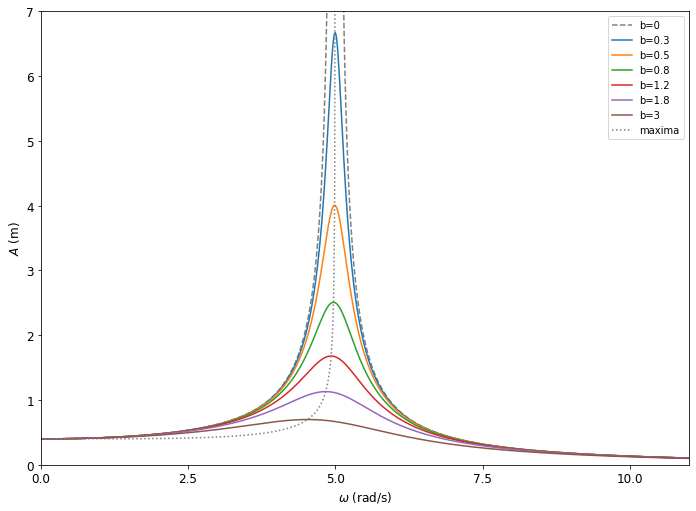

In [44]:
# Δημιουργούμε μία κανή εικόνα στην οποία θα προσθέσουμε μετά στοιχεία
# με το object oriented τρόπο της matplotlib
fig10 = plt.figure()
# επανακαθορίζουμε μικρότερο υπόμνημα
mpl.rcParams['legend.fontsize'] = 10
# προσθέτουμε άξονες
ax = fig10.add_axes([0.1,0.1,0.9,0.9])
# ax = fig10.add_axes([0,0,1,1]) in savefig give no axis
# Προσθέτουμε γραφικές παραστάσεις με τα χρώματα, το στυλ γραμμής
# και τις ετικέττες που θέλουμε
ax.plot(x_vals,yA0, '--', color='tab:gray', label='b=0')
ax.plot(x_vals,yA1, label='b=0.3')
ax.plot(x_vals,yA2, label='b=0.5')
ax.plot(x_vals,yA3, label='b=0.8')
ax.plot(x_vals,yA4, label='b=1.2')
ax.plot(x_vals,yA5, label='b=1.8')
ax.plot(x_vals,yA6, label='b=3')
ax.plot(x_vals,yAmax,':', color='tab:gray', label='maxima')

#ax.set_title("Μέγιστο πλάτος σε εξαναγκασμένη ταλάντωση")
# Καθορίζουμε τα όρια των αξόνων
ax.set_ylim(0,7)
ax.set_xlim(0,11)
# Καθορίζουμε τα ticks στον x-άξονα όπως μας βολεύει
ax.set_xticks([0,2.5,5,7.5,10])
# Καθορίζουμε τις λεζάντες των αξόνων
ax.set_xlabel('$\omega$ (rad/s)')
ax.set_ylabel('$A$ (m)')
# Και τη θέση του υπομνήματος
ax.legend(loc = 'upper right') # legend placed at lower right
# Και τέλος προσθέτουμε τον άξονα (ίσως περιττό)
fig10.add_axes(ax)
# και σώζουμε την εικόνα με μεγάλη ανάλυση 300dpi
plt.savefig('./figures/Resonance-variusb-maxima-2.png', dpi=300)
plt.show()

Διάγραμμα super επαγγελματικό, έτοιμο για δημοσίευση!